<a href="https://colab.research.google.com/github/1fac/mi_proyecto_git_61680/blob/main/Mi_proyecto_61680.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Presentación del proyecto

Este proyecto utiliza técnicas de machine learning para analizar patrones en la facturación y detectar oportunidades de mejora en los beneficios operativos. El enfoque principal es evaluar las diferencias entre la facturación dirigida a sociedades relacionadas y a clientes externos, identificando posibles estrategias para maximizar la rentabilidad. A través de un modelo predictivo, se pretende priorizar la facturación a sociedades externas al grupo, siempre que estas representen una oportunidad financiera más rentable. Los datos analizados incluyen transacciones de sociedades ubicadas en América Latina e Italia. Los resultados esperados incluyen la identificación de nuevos mercados más rentables y un impacto positivo en la estructura operativa.

La motivación de este proyecto radica en la necesidad de optimizar los beneficios operativos y explorar nuevas oportunidades comerciales más rentables fuera del grupo empresarial. Profesionalmente, este trabajo representa una oportunidad clave para destacar en mi rol como asesor financiero, aportando valor estratégico a la organización y fortaleciendo mi desarrollo personal y prestigio dentro de la empresa.


El análisis está dirigido a la dirección y líderes estratégicos de la compañía interesados en optimizar la rentabilidad operativa. También será relevante para equipos de finanzas y planeamiento, dado que el proyecto proporcionará herramientas prácticas para orientar decisiones comerciales basadas en datos.

Conclusión y relevancia

El proyecto busca redefinir la estrategia de facturación al priorizar mercados externos más rentables, lo cual no solo incrementará los beneficios operativos, sino que también diversificará las fuentes de ingreso. La aplicación de machine learning asegura decisiones basadas en datos concretos, maximizando el retorno de inversión y mejorando la eficiencia en la asignación de recursos. Este enfoque representa un cambio estratégico que podría sentar las bases para un crecimiento sostenido en nuevos mercados clave.

En el negocio de ingeniería y construcción, gran parte de la facturación actual se realiza hacia sociedades relacionadas dentro del grupo. Si bien estas transacciones son importantes, podrían estar limitando el potencial de crecimiento de los beneficios operativos. Este proyecto busca evaluar si enfocar una mayor proporción de la facturación hacia sociedades externas al grupo podría generar mejores resultados financieros.

El análisis se centrará exclusivamente en los datos de facturación, sin considerar costos, para identificar patrones y tendencias que ayuden a determinar qué tipo de clientes o mercados generan mayores ingresos. Con el uso de machine learning, se procesará la información histórica de facturación para comparar los ingresos provenientes de sociedades relacionadas frente a los de clientes externos.

El objetivo es sacar conclusiones basadas en datos sobre qué mercados o tipos de clientes ofrecen mejores oportunidades de rentabilidad, especialmente en regiones clave como América Latina e Italia. Esto permitirá a la dirección evaluar opciones para diversificar los ingresos y maximizar los beneficios operativos sin comprometer la estabilidad actual del negocio.

# Presentación ejecutiva

# Lectura de datos

Importo las librerías a utilizar para la lectura, limpieza y procesamiento de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew
import plotly.express as px
import chardet
import shutil
import requests
from io import StringIO
import folium
import folium
import pandas as pd
from folium.plugins import MarkerCluster
from folium import Choropleth
import locale
import datetime as dt
from datetime import datetime as dt_dt
pd.set_option('display.max_columns', 30)
!pip install -U scikit-learn
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))
from matplotlib.ticker import ScalarFormatter
from sklearn.preprocessing import MinMaxScaler
from matplotlib.ticker import FuncFormatter

##En este punto accedo a bases relacionales desde Pandas.

Cómo primer punto estoy configurando mí usuario de Git.

In [2]:
!git config --global user.name "1fac"
!git config --global user.email "facundoseoane@hotmail.com"

Acá estoy clonando la carpeta desde dónde extraígo los datos.

In [3]:
!rm -rf mi_proyecto_git_61680
!git clone https://github.com/1fac/mi_proyecto_git_61680.git


Cloning into 'mi_proyecto_git_61680'...
remote: Enumerating objects: 186, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 186 (delta 66), reused 26 (delta 26), pack-reused 92 (from 1)
Receiving objects: 100% (186/186), 92.67 MiB | 6.55 MiB/s, done.
Resolving deltas: 100% (74/74), done.


Hago una lectura de los archivos que tengo en la carpeta de trabajo.

In [4]:
!ls mi_proyecto_git_61680

'CLASE DOCUMENTOS.csv'	'df Fac2.csv'  'df Fac4.csv'		  README.md
'df Fac1.csv'		'df Fac3.csv'   Mi_proyecto_61680.ipynb   Sociedades.csv


Hago una lectura previa para determinar la codificación de los datos

In [5]:
with open("mi_proyecto_git_61680/df Fac3.csv", "rb") as f:
    result = chardet.detect(f.read())
    print(result)

{'encoding': 'UTF-8-SIG', 'confidence': 1.0, 'language': ''}


Realizo una lectura previa de uno de los archivos

In [6]:
with open("mi_proyecto_git_61680/df Fac1.csv", "r", encoding="UTF-8-SIG") as file:
    for i in range(5):
        print(file.readline())


St;Soc.;Div.;Cliente;SocGLA;Nombre Clie;Clase;Referencia;Nº doc.;CPag;Texto;Usuario;Doc.comp.;Ref.fact.;Año;Ejerc./mes;Período;Fecha doc.;Fe.contab.;Importe en MD;Mon.;Tp.camb.ef.;Importe en ML;ML;Impte.valor.ML2;Venc.neto;Demora;Compens.;Soc. Relacionada

@5B\Qcompens.@;01CA;KZ38;227;S00133;INGENIERIA CHILE S.A.;DZ;;12000011;FF15;;TEAIRL;12000011;12000011;2010;2010/05;5;30/11/2010;30/11/2010;582187,00;CAD;1,00;582187,00;CAD;547065,59;30/11/2010;0;30/11/2010;Si

@5B\Qcompens.@;01CA;KZ38;227;S00133;INGENIERIA CHILE S.A.;DZ;;12000012;INME;;TEAIRL;12000014;12000012;2010;2010/05;5;30/11/2010;30/11/2010;-547065,59;USD;1,06;-582187,00;CAD;-547065,59;30/11/2010;29;29/12/2010;Si

@5B\Qcompens.@;01CA;KZ38;227;S00133;INGENIERIA CHILE S.A.;DZ;;12000014;;;TEAIRL;12000014;12000014;2010;2010/06;6;29/12/2010;29/12/2010;-415303,68;USD;1,03;-426568,91;CAD;-415303,68;29/12/2010;0;29/12/2010;Si

@5B\Qcompens.@;01CA;KZ38;227;S00133;INGENIERIA CHILE S.A.;DZ;;12000020;;;TEAIRL;12000020;12000020;2010;2010/11

Importo los 4 archivos de datos que confecciona la base total a analizar desde Github y armo un solo Dataset

In [7]:
# URLs de los archivos en GitHub
urls = [
    "https://raw.githubusercontent.com/1fac/mi_proyecto_git_61680/main/df%20Fac1.csv",
    "https://raw.githubusercontent.com/1fac/mi_proyecto_git_61680/main/df%20Fac2.csv",
    "https://raw.githubusercontent.com/1fac/mi_proyecto_git_61680/main/df%20Fac3.csv",
    "https://raw.githubusercontent.com/1fac/mi_proyecto_git_61680/main/df%20Fac4.csv",
]

# Lista para almacenar los DataFrames
dataframes = []

# Descargar y cargar cada archivo en un DataFrame
for url in urls:
    response = requests.get(url)
    if response.status_code == 200:
        csv_data = StringIO(response.text)
        df = pd.read_csv(csv_data, sep=";", encoding="UTF-8-SIG", low_memory=False)
        dataframes.append(df)
    else:
        print(f"Error al descargar el archivo: {url}")

# Combinar todos los DataFrames en uno solo
df_comp_orig = pd.concat(dataframes, ignore_index=True)

# Mostrar las primeras filas del dataset combinado
print(df_comp_orig.head(5))
print(f"Total de filas combinadas: {len(df_comp_orig)}")


               St  Soc.  Div.  Cliente  SocGLA            Nombre Clie Clase  \
0  @5B\Qcompens.@  01CA  KZ38      227  S00133  INGENIERIA CHILE S.A.    DZ   
1  @5B\Qcompens.@  01CA  KZ38      227  S00133  INGENIERIA CHILE S.A.    DZ   
2  @5B\Qcompens.@  01CA  KZ38      227  S00133  INGENIERIA CHILE S.A.    DZ   
3  @5B\Qcompens.@  01CA  KZ38      227  S00133  INGENIERIA CHILE S.A.    DZ   
4  @5B\Qcompens.@  01CA  KZ38      227  S00133  INGENIERIA CHILE S.A.    DZ   

  Referencia   Nº doc.  CPag Texto Usuario     Doc.comp. Ref.fact.   Año  \
0        NaN  12000011  FF15   NaN  TEAIRL 12,000,011.00  12000011  2010   
1        NaN  12000012  INME   NaN  TEAIRL 12,000,014.00  12000012  2010   
2        NaN  12000014   NaN   NaN  TEAIRL 12,000,014.00  12000014  2010   
3        NaN  12000020   NaN   NaN  TEAIRL 12,000,020.00  12000020  2010   
4        NaN  12000027   NaN   NaN  TEAIRL 12,000,027.00  12000027  2009   

  Ejerc./mes  Período  Fecha doc.  Fe.contab. Importe en MD Mon. Tp.

Guardo como CSV el dataset confeccionado.

In [8]:
df_comp_orig.to_csv("df_comp_orig.csv", index=False, sep=";", encoding="UTF-8-SIG")



Realizo un análisis previo de datos

In [9]:
df_comp_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323063 entries, 0 to 323062
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   St                323063 non-null  object 
 1   Soc.              323063 non-null  object 
 2   Div.              323063 non-null  object 
 3   Cliente           323063 non-null  int64  
 4   SocGLA            145498 non-null  object 
 5   Nombre Clie       323063 non-null  object 
 6   Clase             323063 non-null  object 
 7   Referencia        301695 non-null  object 
 8   Nº doc.           323063 non-null  int64  
 9   CPag              232537 non-null  object 
 10  Texto             275847 non-null  object 
 11  Usuario           323063 non-null  object 
 12  Doc.comp.         320706 non-null  float64
 13  Ref.fact.         323063 non-null  object 
 14  Año               323063 non-null  int64  
 15  Ejerc./mes        323063 non-null  object 
 16  Período           32

In [10]:
df_comp_orig.shape

(323063, 29)

Tengo 29 columnas y 323.063 filas

In [11]:
df_comp_orig.head()

,St,Soc.,Div.,Cliente,SocGLA,Nombre Clie,Clase,Referencia,Nº doc.,CPag,Texto,Usuario,Doc.comp.,Ref.fact.,Año,Ejerc./mes,Período,Fecha doc.,Fe.contab.,Importe en MD,Mon.,Tp.camb.ef.,Importe en ML,ML,Impte.valor.ML2,Venc.neto,Demora,Compens.,Soc. Relacionada
0,@5B\Qcompens.@,01CA,KZ38,227,S00133,INGENIERIA CHILE S.A.,DZ,NaN,12000011,FF15,NaN,TEAIRL,"12,000,011.00",12000011,2010,2010/05,5,30/11/2010,30/11/2010,"582187,00",CAD,"1,00","582187,00",CAD,"547065,59",30/11/2010,0.00,30/11/2010,Si
1,@5B\Qcompens.@,01CA,KZ38,227,S00133,INGENIERIA CHILE S.A.,DZ,NaN,12000012,INME,NaN,TEAIRL,"12,000,014.00",12000012,2010,2010/05,5,30/11/2010,30/11/2010,"-547065,59",USD,"1,06","-582187,00",CAD,"-547065,59",30/11/2010,29.00,29/12/2010,Si
2,@5B\Qcompens.@,01CA,KZ38,227,S00133,INGENIERIA CHILE S.A.,DZ,NaN,12000014,NaN,NaN,TEAIRL,"12,000,014.00",12000014,2010,2010/06,6,29/12/2010,29/12/2010,"-415303,68",USD,"1,03","-426568,91",CAD,"-415303,68",29/12/2010,0.00,29/12/2010,Si
3,@5B\Qcompens.@,01CA,KZ38,227,S00133,INGENIERIA CHILE S.A.,DZ,NaN,12000020,NaN,NaN,TEAIRL,"12,000,020.00",12000020,2010,2010/11,11,18/05/2011,18/05/2011,"-202596,03",USD,"1,00","-202440,95",CAD,"-202596,03",18/05/2011,0.00,18/05/2011,Si
4,@5B\Qcompens.@,01CA,KZ38,227,S00133,INGENIERIA CHILE S.A.,DZ,NaN,12000027,NaN,NaN,TEAIRL,"12,000,027.00",12000027,2009,2009/12,12,07/06/2010,07/06/2010,"-15992,47",USD,"1,06","-17000,00",CAD,"-16141,50",07/06/2010,0.00,07/06/2010,Si


In [12]:
df_comp_orig.tail()

,St,Soc.,Div.,Cliente,SocGLA,Nombre Clie,Clase,Referencia,Nº doc.,CPag,Texto,Usuario,Doc.comp.,Ref.fact.,Año,Ejerc./mes,Período,Fecha doc.,Fe.contab.,Importe en MD,Mon.,Tp.camb.ef.,Importe en ML,ML,Impte.valor.ML2,Venc.neto,Demora,Compens.,Soc. Relacionada
323058,@5B\Qcompens.@,IT02,TG51,6375,S00110,INGENIERIA Engineering Technical and,DR,2100100048/2021,11000332,D03C,FATTURA N. 2100100048/2021 DEL 15.02.21,VOLPEM,"12,000,047.00",11000332,2020,2020/08,8,15/02/2021,15/02/2021,"51940,50",USD,"-/1,21290","42823,40",EUR,"51940,50",31/03/2021,166.00,13/09/2021,Si
323059,@5C\QPendientes@,SA02,CE11,723,S01036,TENCO BAHRAIN,DR,MO-06/2005-05/04,11000110,FF30,Recls. DN M-O-06/2005-05 / 04,TEAHPO,NaN,11000110,2007,2007/07,7,31/01/2008,31/01/2008,"3422,92",USD,"3,75","12835,95",SAR,"3422,92",01/03/2008,6.16,NaN,Si
323060,@5C\QPendientes@,SA02,GG11,723,S01036,TENCO BAHRAIN,DR,MO-06/2005-05/04,11000110,FF30,Recls. DN M-O-06/2005-05 / 04,TEAHPO,NaN,11000110,2007,2007/07,7,31/01/2008,31/01/2008,"321,29",USD,"3,75","1204,84",SAR,"321,29",01/03/2008,6.16,NaN,Si
323061,@5C\QPendientes@,SA02,CE11,723,S01036,TENCO BAHRAIN,DR,M-O-06/2008-01,11000167,INME,Various Expenses June 08-ALUMINIO,TMESAJ,NaN,11000167,2007,2007/12,12,24/06/2008,30/06/2008,"501684,35",USD,"3,75","1881316,33",SAR,"501684,35",30/06/2008,6.04,NaN,Si
323062,@5B\Qcompens.@,UY11,445,5189,S03408,CONSTRUCCIONES Y PRESTACIONES,DR,A 0002518,11000026,FF30,Licencias Microsoft Azure,TURASW,"12,000,006.00",11000026,2022,2022/06,6,22/12/2022,22/12/2022,"33580,00",USD,"38,34","1287490,78",UYU,"33580,00",21/01/2023,344.00,31/12/2023,Si


Realizo una consulta de las columnas que tiene y confecciono un diccionario para entender los datos a analizar.

In [13]:
df_comp_orig.columns

Index(['St', 'Soc.', 'Div.', 'Cliente', 'SocGLA', 'Nombre Clie', 'Clase',
       'Referencia', 'Nº doc.', 'CPag', 'Texto', 'Usuario', 'Doc.comp.',
       'Ref.fact.', 'Año', 'Ejerc./mes', 'Período', 'Fecha doc.', 'Fe.contab.',
       'Importe en MD', 'Mon.', 'Tp.camb.ef.', 'Importe en ML', 'ML',
       'Impte.valor.ML2', 'Venc.neto', 'Demora', 'Compens.',
       'Soc. Relacionada'],
      dtype='object')

###Diccionario del Dataset

St: Estado del Documento (No relevante)

Soc.: Sociedad Emisora

Div.: Nomenclador de proyecto por sociedad

Cliente: N° de Cliente

SocGLA: Código de sociedad relacionada (No relevante, dado que ya lo tengo al dato simplificado en la ultima columna)

Nombre Clientes: Nombre de cliente

Clase: Nomenclador del tipo de comprobante emitido

Referencia: Número de documento (No relevante)

Nº doc.: Número de documento interno

CPago: Condición de Pago (No relevante)

Texto: Texto de referencia (No relevante)

Usuario: Usuario que registro al sistema (No relevante)

Doc.comp.: Documento interno que referencia operaciones

Ref.fact.: Número de documento interno o asociación a documentos (No relevante)

Año: Año de ejercicio (No relevante)

Ejerc./mes: Año y mes de ejercicio (No relevante)

Período: Período de ejercicio (No relevante)

Fecha doc.: Fecha de documento

Fe. Contab.: Fecha de contabilizacion

Importe en MD: Importe en moneda de documento

Mon.: Moneda de documento

Tp.camb.ef.: Tipo de cambios de moneda extranjera con respecto a moneda local

Importe en ML: Importe en moneda local

ML: Moneda local

Impte.valor.ML2: Importe homogeneizado en USD

Venc.neto: Vencimiento del pago

Demora: Días de vencimiento

Soc. Relacionada: La sociedad es relacionada o no


# Data Wranglimg - Limpieza y transformación de datos

Identificar valores nulos

In [14]:
df_comp_orig.isnull().sum()

,0
St,0
Soc.,0
Div.,0
Cliente,0
SocGLA,177565
Nombre Clie,0
Clase,0
Referencia,21368
Nº doc.,0
CPag,90526


Elimino las columnas que no me parecen relevantes a priori

In [15]:
dropna_columns =['St', 'Año', 'Ejerc./mes', 'Período', 'Referencia' , 'CPag', 'Usuario', 'Texto', 'Ref.fact.', 'SocGLA']
df_comp_orig.drop(columns=dropna_columns, inplace=True)

Transformación de Fechas

In [16]:
columnas_fechas = ['Fecha doc.', 'Fe.contab.', 'Venc.neto', 'Compens.']
df_comp_orig[columnas_fechas] = df_comp_orig[columnas_fechas].apply(pd.to_datetime, dayfirst=True, errors='coerce')
df_comp_orig

,Soc.,Div.,Cliente,Nombre Clie,Clase,Nº doc.,Doc.comp.,Fecha doc.,Fe.contab.,Importe en MD,Mon.,Tp.camb.ef.,Importe en ML,ML,Impte.valor.ML2,Venc.neto,Demora,Compens.,Soc. Relacionada
0,01CA,KZ38,227,INGENIERIA CHILE S.A.,DZ,12000011,"12,000,011.00",2010-11-30,2010-11-30,"582187,00",CAD,"1,00","582187,00",CAD,"547065,59",2010-11-30,0.00,2010-11-30,Si
1,01CA,KZ38,227,INGENIERIA CHILE S.A.,DZ,12000012,"12,000,014.00",2010-11-30,2010-11-30,"-547065,59",USD,"1,06","-582187,00",CAD,"-547065,59",2010-11-30,29.00,2010-12-29,Si
2,01CA,KZ38,227,INGENIERIA CHILE S.A.,DZ,12000014,"12,000,014.00",2010-12-29,2010-12-29,"-415303,68",USD,"1,03","-426568,91",CAD,"-415303,68",2010-12-29,0.00,2010-12-29,Si
3,01CA,KZ38,227,INGENIERIA CHILE S.A.,DZ,12000020,"12,000,020.00",2011-05-18,2011-05-18,"-202596,03",USD,"1,00","-202440,95",CAD,"-202596,03",2011-05-18,0.00,2011-05-18,Si
4,01CA,KZ38,227,INGENIERIA CHILE S.A.,DZ,12000027,"12,000,027.00",2010-06-07,2010-06-07,"-15992,47",USD,"1,06","-17000,00",CAD,"-16141,50",2010-06-07,0.00,2010-06-07,Si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323058,IT02,TG51,6375,INGENIERIA Engineering Technical and,DR,11000332,"12,000,047.00",2021-02-15,2021-02-15,"51940,50",USD,"-/1,21290","42823,40",EUR,"51940,50",2021-03-31,166.00,2021-09-13,Si
323059,SA02,CE11,723,TENCO BAHRAIN,DR,11000110,NaN,2008-01-31,2008-01-31,"3422,92",USD,"3,75","12835,95",SAR,"3422,92",2008-03-01,6.16,NaT,Si
323060,SA02,GG11,723,TENCO BAHRAIN,DR,11000110,NaN,2008-01-31,2008-01-31,"321,29",USD,"3,75","1204,84",SAR,"321,29",2008-03-01,6.16,NaT,Si
323061,SA02,CE11,723,TENCO BAHRAIN,DR,11000167,NaN,2008-06-24,2008-06-30,"501684,35",USD,"3,75","1881316,33",SAR,"501684,35",2008-06-30,6.04,NaT,Si


Configuro el año y el mes de generación de documentos.

El año quedará en su fomrato único, pero el mes lo voy a mapear para tener el texto en español.

In [17]:
df_comp_orig['Año'] = df_comp_orig['Fecha doc.'].dt.year

In [18]:
df_comp_orig['Año'] = df_comp_orig['Año'].fillna(0).astype('int64')

In [19]:
df_comp_orig['Demora'] = df_comp_orig['Demora'].fillna(0).astype('int64')

In [20]:
meses_es = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}
df_comp_orig['Mes'] = df_comp_orig['Fecha doc.'].dt.month.map(meses_es)

Traigo la referencia de las clases de documentos para entender a que corresponde cada clase para solo quedarme con los datos de facturación que quiero analizar.

In [21]:
df_clase_doc = pd.read_csv('/content/mi_proyecto_git_61680/CLASE DOCUMENTOS.csv', sep=';')
df_clase_doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Clase             234 non-null    object
 1   DENOMINACIÓN SAP  224 non-null    object
 2   DENOMINACIÓN      235 non-null    object
 3   FACTURACIÓN       235 non-null    object
dtypes: object(4)
memory usage: 7.5+ KB


Reduzco la info de la tabla clase_doc para trabajar más prolijo.

In [22]:
df_clase_doc = df_clase_doc[['Clase', 'DENOMINACIÓN', 'FACTURACIÓN']]
df_clase_doc['FACTURACIÓN'].value_counts()

,count
FACTURACIÓN,
NO,221
SI,14


De acuerdo al resumen, puedo tener 221 clases de documentos que no voy a necesitar y 14 que si. Voy a leer un detalle de los documentos que corresponden a facturaciones para asegurarme.

In [23]:
df_clase_doc[df_clase_doc ['FACTURACIÓN'] == 'SI']

,Clase,DENOMINACIÓN,FACTURACIÓN
22,D1,Factura,SI
24,DB,Factura,SI
27,DE,Factura,SI
28,DF,Nota de Crédito,SI
29,DG,Nota de Crédito,SI
30,DH,Nota de Débito,SI
31,DI,Nota de Débito,SI
34,DL,Factura,SI
35,DM,Factura,SI
36,DN,Nota de Crédito,SI


Realizo un cruce de información para quedarme solo con documentos de facturación.


In [24]:
Combina_df_comp_orig_clase_doc = pd.merge(df_comp_orig, df_clase_doc, on='Clase', how='left')
Combina_df_comp_orig_clase_doc

,Soc.,Div.,Cliente,Nombre Clie,Clase,Nº doc.,Doc.comp.,Fecha doc.,Fe.contab.,Importe en MD,Mon.,Tp.camb.ef.,Importe en ML,ML,Impte.valor.ML2,Venc.neto,Demora,Compens.,Soc. Relacionada,Año,Mes,DENOMINACIÓN,FACTURACIÓN
0,01CA,KZ38,227,INGENIERIA CHILE S.A.,DZ,12000011,"12,000,011.00",2010-11-30,2010-11-30,"582187,00",CAD,"1,00","582187,00",CAD,"547065,59",2010-11-30,0,2010-11-30,Si,2010,Noviembre,Compensación por Pago,NO
1,01CA,KZ38,227,INGENIERIA CHILE S.A.,DZ,12000012,"12,000,014.00",2010-11-30,2010-11-30,"-547065,59",USD,"1,06","-582187,00",CAD,"-547065,59",2010-11-30,29,2010-12-29,Si,2010,Noviembre,Compensación por Pago,NO
2,01CA,KZ38,227,INGENIERIA CHILE S.A.,DZ,12000014,"12,000,014.00",2010-12-29,2010-12-29,"-415303,68",USD,"1,03","-426568,91",CAD,"-415303,68",2010-12-29,0,2010-12-29,Si,2010,Diciembre,Compensación por Pago,NO
3,01CA,KZ38,227,INGENIERIA CHILE S.A.,DZ,12000020,"12,000,020.00",2011-05-18,2011-05-18,"-202596,03",USD,"1,00","-202440,95",CAD,"-202596,03",2011-05-18,0,2011-05-18,Si,2011,Mayo,Compensación por Pago,NO
4,01CA,KZ38,227,INGENIERIA CHILE S.A.,DZ,12000027,"12,000,027.00",2010-06-07,2010-06-07,"-15992,47",USD,"1,06","-17000,00",CAD,"-16141,50",2010-06-07,0,2010-06-07,Si,2010,Junio,Compensación por Pago,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323058,IT02,TG51,6375,INGENIERIA Engineering Technical and,DR,11000332,"12,000,047.00",2021-02-15,2021-02-15,"51940,50",USD,"-/1,21290","42823,40",EUR,"51940,50",2021-03-31,166,2021-09-13,Si,2021,Febrero,Factura,SI
323059,SA02,CE11,723,TENCO BAHRAIN,DR,11000110,NaN,2008-01-31,2008-01-31,"3422,92",USD,"3,75","12835,95",SAR,"3422,92",2008-03-01,6,NaT,Si,2008,Enero,Factura,SI
323060,SA02,GG11,723,TENCO BAHRAIN,DR,11000110,NaN,2008-01-31,2008-01-31,"321,29",USD,"3,75","1204,84",SAR,"321,29",2008-03-01,6,NaT,Si,2008,Enero,Factura,SI
323061,SA02,CE11,723,TENCO BAHRAIN,DR,11000167,NaN,2008-06-24,2008-06-30,"501684,35",USD,"3,75","1881316,33",SAR,"501684,35",2008-06-30,6,NaT,Si,2008,Junio,Factura,SI


In [25]:
Facturación = Combina_df_comp_orig_clase_doc[Combina_df_comp_orig_clase_doc['FACTURACIÓN'] == 'SI']

Facturación

,Soc.,Div.,Cliente,Nombre Clie,Clase,Nº doc.,Doc.comp.,Fecha doc.,Fe.contab.,Importe en MD,Mon.,Tp.camb.ef.,Importe en ML,ML,Impte.valor.ML2,Venc.neto,Demora,Compens.,Soc. Relacionada,Año,Mes,DENOMINACIÓN,FACTURACIÓN
10,01CA,K001,2127,JV INGENIERIA / Somervill,DR,11000000,"90,000,000.00",2007-12-31,2007-12-31,"700000,00",CAD,"1,00","700000,00",CAD,"700000,00",2008-01-10,81,2008-03-31,No,2007,Diciembre,Factura,SI
11,01CA,K001,2127,JV INGENIERIA / Somervill,DR,11000001,"90,000,001.00",2007-12-31,2007-12-31,"700000,00",CAD,"1,00","700000,00",CAD,"700000,00",2008-01-10,81,2008-03-31,No,2007,Diciembre,Factura,SI
12,01CA,K001,2127,JV INGENIERIA / Somervill,DR,11000002,"90,000,002.00",2007-12-31,2007-12-31,"1200000,00",CAD,"1,00","1200000,00",CAD,"1200000,00",2008-01-10,81,2008-03-31,No,2007,Diciembre,Factura,SI
26,01CR,M327,2056,REFINADORA COSTARRICENSE DE PETROLE,DR,11000014,"90,000,005.00",2007-08-31,2007-12-31,"323366,84",USD,"0,50","161068,93",CRC,"323366,84",2008-01-10,82,2008-04-01,No,2007,Agosto,Factura,SI
38,01CR,M336,2057,Instalaciones Inabensa S.A.,DR,11000017,"12,000,001.00",2007-11-30,2007-12-31,"212667,32",USD,"0,50","105929,53",CRC,"212667,32",2008-01-10,81,2008-03-31,No,2007,Noviembre,Factura,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323058,IT02,TG51,6375,INGENIERIA Engineering Technical and,DR,11000332,"12,000,047.00",2021-02-15,2021-02-15,"51940,50",USD,"-/1,21290","42823,40",EUR,"51940,50",2021-03-31,166,2021-09-13,Si,2021,Febrero,Factura,SI
323059,SA02,CE11,723,TENCO BAHRAIN,DR,11000110,NaN,2008-01-31,2008-01-31,"3422,92",USD,"3,75","12835,95",SAR,"3422,92",2008-03-01,6,NaT,Si,2008,Enero,Factura,SI
323060,SA02,GG11,723,TENCO BAHRAIN,DR,11000110,NaN,2008-01-31,2008-01-31,"321,29",USD,"3,75","1204,84",SAR,"321,29",2008-03-01,6,NaT,Si,2008,Enero,Factura,SI
323061,SA02,CE11,723,TENCO BAHRAIN,DR,11000167,NaN,2008-06-24,2008-06-30,"501684,35",USD,"3,75","1881316,33",SAR,"501684,35",2008-06-30,6,NaT,Si,2008,Junio,Factura,SI


Este proceso de identificar solo los documentos que voy a utilizar, me permitió reducir mi base en un 59% de los datos.

Traigo referencias de país, para tener en cuenta las regiones que estoy analizando.

In [26]:
Soc_País = pd.read_csv('/content/mi_proyecto_git_61680/Sociedades.csv', sep=';')
Soc_País.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Soc.                  308 non-null    object
 1   Nombre de la Empresa  308 non-null    object
 2   Población             308 non-null    object
 3   Mon.                  308 non-null    object
 4   País                  307 non-null    object
dtypes: object(5)
memory usage: 12.2+ KB


In [27]:
Soc_País = Soc_País[['Soc.', 'País']]
Soc_País

,Soc.,País
0,0001,Brasil
1,0003,Estados Unidos
2,01CA,Canada
3,01CR,Costa Rica
4,01GT,Guatemala
...,...,...
303,VE20,Venezuela
304,VE21,Venezuela
305,VG02,Islas Virgenes
306,ZA01,Sudafrica


In [28]:
Facturación = pd.merge(Facturación, Soc_País, on='Soc.', how='left')
Facturación

,Soc.,Div.,Cliente,Nombre Clie,Clase,Nº doc.,Doc.comp.,Fecha doc.,Fe.contab.,Importe en MD,Mon.,Tp.camb.ef.,Importe en ML,ML,Impte.valor.ML2,Venc.neto,Demora,Compens.,Soc. Relacionada,Año,Mes,DENOMINACIÓN,FACTURACIÓN,País
0,01CA,K001,2127,JV INGENIERIA / Somervill,DR,11000000,"90,000,000.00",2007-12-31,2007-12-31,"700000,00",CAD,"1,00","700000,00",CAD,"700000,00",2008-01-10,81,2008-03-31,No,2007,Diciembre,Factura,SI,Canada
1,01CA,K001,2127,JV INGENIERIA / Somervill,DR,11000001,"90,000,001.00",2007-12-31,2007-12-31,"700000,00",CAD,"1,00","700000,00",CAD,"700000,00",2008-01-10,81,2008-03-31,No,2007,Diciembre,Factura,SI,Canada
2,01CA,K001,2127,JV INGENIERIA / Somervill,DR,11000002,"90,000,002.00",2007-12-31,2007-12-31,"1200000,00",CAD,"1,00","1200000,00",CAD,"1200000,00",2008-01-10,81,2008-03-31,No,2007,Diciembre,Factura,SI,Canada
3,01CR,M327,2056,REFINADORA COSTARRICENSE DE PETROLE,DR,11000014,"90,000,005.00",2007-08-31,2007-12-31,"323366,84",USD,"0,50","161068,93",CRC,"323366,84",2008-01-10,82,2008-04-01,No,2007,Agosto,Factura,SI,Costa Rica
4,01CR,M336,2057,Instalaciones Inabensa S.A.,DR,11000017,"12,000,001.00",2007-11-30,2007-12-31,"212667,32",USD,"0,50","105929,53",CRC,"212667,32",2008-01-10,81,2008-03-31,No,2007,Noviembre,Factura,SI,Costa Rica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189755,IT02,TG51,6375,INGENIERIA Engineering Technical and,DR,11000332,"12,000,047.00",2021-02-15,2021-02-15,"51940,50",USD,"-/1,21290","42823,40",EUR,"51940,50",2021-03-31,166,2021-09-13,Si,2021,Febrero,Factura,SI,Italia
189756,SA02,CE11,723,TENCO BAHRAIN,DR,11000110,NaN,2008-01-31,2008-01-31,"3422,92",USD,"3,75","12835,95",SAR,"3422,92",2008-03-01,6,NaT,Si,2008,Enero,Factura,SI,Arabia Saudita
189757,SA02,GG11,723,TENCO BAHRAIN,DR,11000110,NaN,2008-01-31,2008-01-31,"321,29",USD,"3,75","1204,84",SAR,"321,29",2008-03-01,6,NaT,Si,2008,Enero,Factura,SI,Arabia Saudita
189758,SA02,CE11,723,TENCO BAHRAIN,DR,11000167,NaN,2008-06-24,2008-06-30,"501684,35",USD,"3,75","1881316,33",SAR,"501684,35",2008-06-30,6,NaT,Si,2008,Junio,Factura,SI,Arabia Saudita


Necesito tener un ID de registro único para poder trabajar sin errores.
Tomo una muestra de número de documento para determinar sí se repite.

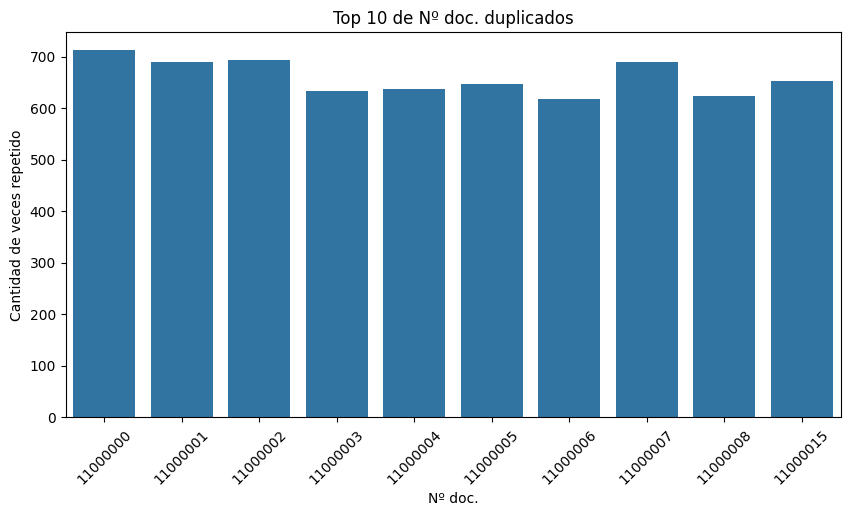

In [29]:
duplicados_contados = Facturación['Nº doc.'].value_counts()
duplicados_contados = duplicados_contados[duplicados_contados > 1]

plt.figure(figsize=(10,5))
sns.barplot(x=duplicados_contados.index[:10], y=duplicados_contados.values[:10])
plt.xticks(rotation=45)
plt.xlabel("Nº doc.")
plt.ylabel("Cantidad de veces repetido")
plt.title("Top 10 de Nº doc. duplicados")
plt.show()

Efectivamente, no lo puedo tomar como referencia porque hay numeros que se repiten varias veces.

Tomaré una muestra pequeña para tratar de determinar campos diferentes que me permitan armar un ID único.


In [30]:
duplicados = Facturación[Facturación.duplicated(subset=['Nº doc.'], keep=False)]

# Agrupar por "Nº doc." y mostrar solo aquellos con variaciones en otras columnas
grupo_duplicados = duplicados.groupby('Nº doc.').filter(lambda x: x.nunique().sum() > 2)

# Tomar una muestra de 1 único "Nº doc." con sus variaciones en otras columnas
muestra = grupo_duplicados.groupby('Nº doc.').first().reset_index().sample(1)
Facturación[Facturación['Nº doc.'] == muestra['Nº doc.'].values[0]]

,Soc.,Div.,Cliente,Nombre Clie,Clase,Nº doc.,Doc.comp.,Fecha doc.,Fe.contab.,Importe en MD,Mon.,Tp.camb.ef.,Importe en ML,ML,Impte.valor.ML2,Venc.neto,Demora,Compens.,Soc. Relacionada,Año,Mes,DENOMINACIÓN,FACTURACIÓN,País
1714,AR02,CO01,102,ACERO S.A.I.C.,DH,29000002,"12,001,897.00",2000-10-26,2004-12-31,"164,00",ARS,"1,00","164,00",ARS,"164,00",2000-11-17,1,2005-06-30,Si,2000,Octubre,Nota de Débito,SI,Argentina
3812,AR05,CO01,121,EXPERTA ART SA,DH,29000002,"12,000,117.00",2003-07-30,2004-12-31,"2254,20",ARS,"1,00","2254,20",ARS,"775,97",2003-08-19,827,2005-11-23,No,2003,Julio,Nota de Débito,SI,Argentina
3861,AR09,CO01,287,INGENIERIA INTERNATIONAL CONSTRUCTION,DH,29000002,"12,000,006.00",2004-07-14,2004-12-31,"125,00",ARS,"1,00","125,00",ARS,"42,46",2004-07-24,2,2011-06-30,Si,2004,Julio,Nota de Débito,SI,Argentina
4136,AR16,ZINI,121,EXPERTA ART SA,DH,29000002,"12,000,249.00",2003-04-30,2005-06-30,"1512,00",ARS,"1,00","1512,00",ARS,"536,17",2003-05-30,1,2008-08-31,No,2003,Abril,Nota de Débito,SI,Argentina
4636,BR03,319,25,INGENIERIA ENGENHARIA E CONSTRUÇÃO S/A,DH,29000002,"90,000,002.00",2014-10-31,2014-10-31,"500,00",BRL,"1,00","500,00",BRL,"204,57",2014-09-30,32,2014-11-01,Si,2014,Octubre,Nota de Débito,SI,Brasil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187465,ES05,27,6144,TS LNG SAS,DH,29000002,"12,000,009.00",2015-04-13,2015-04-13,"55380,95",EUR,"1,00","55380,95",EUR,"58437,98",2015-05-31,152,2015-10-30,Si,2015,Abril,Nota de Débito,SI,España
187466,ES05,27,6144,TS LNG SAS,DH,29000002,"12,000,009.00",2015-09-04,2015-09-30,"111288,00",EUR,"1,00","111288,00",EUR,"123952,57",2015-10-31,-1,2015-10-30,Si,2015,Septiembre,Nota de Débito,SI,España
187467,ES05,27,6144,TS LNG SAS,DH,29000002,NaN,2016-11-29,2016-11-30,"4723547,46",EUR,"1,00","4723547,46",EUR,"4995623,79",2016-12-31,2,NaT,Si,2016,Noviembre,Nota de Débito,SI,España
187468,ES05,27,6144,TS LNG SAS,DH,29000002,NaN,2017-08-01,2017-08-01,"4711736,57",EUR,"1,00","4711736,57",EUR,"5565503,24",2017-09-30,2,NaT,Si,2017,Agosto,Nota de Débito,SI,España


De la muestra saco en limpio que podría generar un ID único con los campos Año, SOc., Clase y N° Doc., para que sea más prolijo uso guión bajo como separador.


In [31]:
Facturación['indice'] = Facturación['Año'].astype(str) + '_' + Facturación['Soc.'].astype(str) + '_' + Facturación['Clase'].astype(str) + '_' + Facturación['Nº doc.'].astype(str)

# Establecer el nuevo índice correctamente
Facturación = Facturación.set_index('indice')

# Mostrar las primeras filas
Facturación

,Soc.,Div.,Cliente,Nombre Clie,Clase,Nº doc.,Doc.comp.,Fecha doc.,Fe.contab.,Importe en MD,Mon.,Tp.camb.ef.,Importe en ML,ML,Impte.valor.ML2,Venc.neto,Demora,Compens.,Soc. Relacionada,Año,Mes,DENOMINACIÓN,FACTURACIÓN,País
indice,,,,,,,,,,,,,,,,,,,,,,,,
2007_01CA_DR_11000000,01CA,K001,2127,JV INGENIERIA / Somervill,DR,11000000,"90,000,000.00",2007-12-31,2007-12-31,"700000,00",CAD,"1,00","700000,00",CAD,"700000,00",2008-01-10,81,2008-03-31,No,2007,Diciembre,Factura,SI,Canada
2007_01CA_DR_11000001,01CA,K001,2127,JV INGENIERIA / Somervill,DR,11000001,"90,000,001.00",2007-12-31,2007-12-31,"700000,00",CAD,"1,00","700000,00",CAD,"700000,00",2008-01-10,81,2008-03-31,No,2007,Diciembre,Factura,SI,Canada
2007_01CA_DR_11000002,01CA,K001,2127,JV INGENIERIA / Somervill,DR,11000002,"90,000,002.00",2007-12-31,2007-12-31,"1200000,00",CAD,"1,00","1200000,00",CAD,"1200000,00",2008-01-10,81,2008-03-31,No,2007,Diciembre,Factura,SI,Canada
2007_01CR_DR_11000014,01CR,M327,2056,REFINADORA COSTARRICENSE DE PETROLE,DR,11000014,"90,000,005.00",2007-08-31,2007-12-31,"323366,84",USD,"0,50","161068,93",CRC,"323366,84",2008-01-10,82,2008-04-01,No,2007,Agosto,Factura,SI,Costa Rica
2007_01CR_DR_11000017,01CR,M336,2057,Instalaciones Inabensa S.A.,DR,11000017,"12,000,001.00",2007-11-30,2007-12-31,"212667,32",USD,"0,50","105929,53",CRC,"212667,32",2008-01-10,81,2008-03-31,No,2007,Noviembre,Factura,SI,Costa Rica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021_IT02_DR_11000332,IT02,TG51,6375,INGENIERIA Engineering Technical and,DR,11000332,"12,000,047.00",2021-02-15,2021-02-15,"51940,50",USD,"-/1,21290","42823,40",EUR,"51940,50",2021-03-31,166,2021-09-13,Si,2021,Febrero,Factura,SI,Italia
2008_SA02_DR_11000110,SA02,CE11,723,TENCO BAHRAIN,DR,11000110,NaN,2008-01-31,2008-01-31,"3422,92",USD,"3,75","12835,95",SAR,"3422,92",2008-03-01,6,NaT,Si,2008,Enero,Factura,SI,Arabia Saudita
2008_SA02_DR_11000110,SA02,GG11,723,TENCO BAHRAIN,DR,11000110,NaN,2008-01-31,2008-01-31,"321,29",USD,"3,75","1204,84",SAR,"321,29",2008-03-01,6,NaT,Si,2008,Enero,Factura,SI,Arabia Saudita


Analizo el tipo de dato para realizar las transformaciones necesarias para trabajarlo

In [32]:
Facturación.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189760 entries, 2007_01CA_DR_11000000 to 2022_UY11_DR_11000026
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Soc.              189760 non-null  object        
 1   Div.              189760 non-null  object        
 2   Cliente           189760 non-null  int64         
 3   Nombre Clie       189760 non-null  object        
 4   Clase             189760 non-null  object        
 5   Nº doc.           189760 non-null  int64         
 6   Doc.comp.         187829 non-null  float64       
 7   Fecha doc.        189759 non-null  datetime64[ns]
 8   Fe.contab.        189760 non-null  datetime64[ns]
 9   Importe en MD     189760 non-null  object        
 10  Mon.              189760 non-null  object        
 11  Tp.camb.ef.       189663 non-null  object        
 12  Importe en ML     189760 non-null  object        
 13  ML                189760 non-

In [33]:
Facturación[columnas_fechas].info()

<class 'pandas.core.frame.DataFrame'>
Index: 189760 entries, 2007_01CA_DR_11000000 to 2022_UY11_DR_11000026
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Fecha doc.  189759 non-null  datetime64[ns]
 1   Fe.contab.  189760 non-null  datetime64[ns]
 2   Venc.neto   189759 non-null  datetime64[ns]
 3   Compens.    187829 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 7.2+ MB


In [34]:
columnas_fechas2 = ['Fecha doc.', 'Fe.contab.', 'Venc.neto']
Facturación[Facturación[columnas_fechas2].isnull().any(axis=1)]

,Soc.,Div.,Cliente,Nombre Clie,Clase,Nº doc.,Doc.comp.,Fecha doc.,Fe.contab.,Importe en MD,Mon.,Tp.camb.ef.,Importe en ML,ML,Impte.valor.ML2,Venc.neto,Demora,Compens.,Soc. Relacionada,Año,Mes,DENOMINACIÓN,FACTURACIÓN,País
indice,,,,,,,,,,,,,,,,,,,,,,,,
0_EC14_DB_11008674,EC14,445,9625,CHUQUITARCO CANDO ELVA LILIANA,DB,11008674,"12,000,326.00",NaT,2021-09-10,"3623,70",USD,"1,00","3623,70",USD,"3623,70",NaT,44,2021-09-15,No,0,NaN,Factura,SI,Ecuador


Luego de la transformación de las fechas, quedan Nat de manera aceptable, dado que compensación es una fecha de documentos pagados, tranquilamente pueden haber campos vacíos, ya sea por incobrabilidad o por que aún no se ha efectuado por no encontrarse vencido.

Le doy formato a algunos campos objects

In [35]:
columnas_num = ['Importe en MD', 'Tp.camb.ef.', 'Importe en ML', 'Impte.valor.ML2']
Facturación[columnas_num] = (
    Facturación[columnas_num]
    .replace({',': '', '€': '', '$': ''}, regex=True)  # Eliminar comas y símbolos monetarios
    .apply(lambda x: x.replace(',', '.') if isinstance(x, str) else x)  # Reemplazar coma por punto en cadenas
    .apply(pd.to_numeric, errors='coerce')  # Convertir los valores a numérico (float64), no numéricos se convertirán a NaN
)

Facturación[columnas_num] = Facturación[columnas_num].astype('float64')



In [36]:
columnas_str = ['Soc.', 'Cliente', 'Div.','Nombre Clie' , 'Clase', 'Mon.', 'ML', 'Soc. Relacionada', 'FACTURACIÓN', 'DENOMINACIÓN', 'País', 'Mes']
Facturación[columnas_str] = Facturación[columnas_str].astype("string")
Facturación.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189760 entries, 2007_01CA_DR_11000000 to 2022_UY11_DR_11000026
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Soc.              189760 non-null  string        
 1   Div.              189760 non-null  string        
 2   Cliente           189760 non-null  string        
 3   Nombre Clie       189760 non-null  string        
 4   Clase             189760 non-null  string        
 5   Nº doc.           189760 non-null  int64         
 6   Doc.comp.         187829 non-null  float64       
 7   Fecha doc.        189759 non-null  datetime64[ns]
 8   Fe.contab.        189760 non-null  datetime64[ns]
 9   Importe en MD     189760 non-null  float64       
 10  Mon.              189760 non-null  string        
 11  Tp.camb.ef.       189264 non-null  float64       
 12  Importe en ML     189760 non-null  float64       
 13  ML                189760 non-

El campo documento de copensación es muy importante porque en mí experiencia determina si un documento se cobró, sí está pendiente de cobro, si se compensó con otros docuemntos, etc. o sí se anuló el documento, lo que significa que no se presentó al cobro y no correspondería tomarlo en cuenta en nuestro análisis.

In [37]:
Facturación['Doc.comp.'] = Facturación['Doc.comp.'].fillna(0).astype('string')

In [38]:
Facturación['Primeros_3'] = Facturación['Doc.comp.'].str[:3]

In [39]:
resumen = Facturación['Primeros_3'].value_counts().reset_index()
resumen.columns = ['Primeros_3', 'Cuenta']
resumen

,Primeros_3,Cuenta
0,120,178523
1,900,8547
2,0.0,1931
3,301,205
4,330,166
5,100,109
6,110,99
7,302,62
8,290,57
9,331,29


Los documentos de compensación comenzados en 900 son anulaciones, las elimino para limpiar la base de datos y quito el filtro utilizado.

In [40]:
Facturación = Facturación[Facturación['Primeros_3'] != '900']

In [41]:
Facturación = Facturación.drop(columns=['Primeros_3'])

In [42]:
Facturación.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181213 entries, 2007_01CR_DR_11000017 to 2022_UY11_DR_11000026
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Soc.              181213 non-null  string        
 1   Div.              181213 non-null  string        
 2   Cliente           181213 non-null  string        
 3   Nombre Clie       181213 non-null  string        
 4   Clase             181213 non-null  string        
 5   Nº doc.           181213 non-null  int64         
 6   Doc.comp.         181213 non-null  string        
 7   Fecha doc.        181212 non-null  datetime64[ns]
 8   Fe.contab.        181213 non-null  datetime64[ns]
 9   Importe en MD     181213 non-null  float64       
 10  Mon.              181213 non-null  string        
 11  Tp.camb.ef.       180738 non-null  float64       
 12  Importe en ML     181213 non-null  float64       
 13  ML                181213 non-

Leo los datos nulos de la columna Tp.camb.ef. para ver que resuelvo

In [43]:
nulos_tp_camb_ef = Facturación['Tp.camb.ef.'].isnull().sum()
nulos_tp_camb_ef

475

In [44]:
filas_nulas = Facturación[Facturación['Tp.camb.ef.'].isnull()]
filas_nulas

,Soc.,Div.,Cliente,Nombre Clie,Clase,Nº doc.,Doc.comp.,Fecha doc.,Fe.contab.,Importe en MD,Mon.,Tp.camb.ef.,Importe en ML,ML,Impte.valor.ML2,Venc.neto,Demora,Compens.,Soc. Relacionada,Año,Mes,DENOMINACIÓN,FACTURACIÓN,País
indice,,,,,,,,,,,,,,,,,,,,,,,,
2011_BR05_DS_11000023,BR05,TEPA,227,INGENIERIA CHILE S.A.,DS,11000023,12000361.0,2011-07-27,2011-07-27,"4,690,860.00",USD,NaN,"7,198,103.00",BRL,"4,690,860.00",2011-08-16,119,2011-12-13,Si,2011,Julio,Factura,SI,Brasil
2011_BR05_DH_29000008,BR05,CO02,2839,MAVERICK TUBE CORPORATION,DH,29000008,12000098.0,2011-07-25,2011-07-25,"68,880.00",USD,NaN,"107,088.00",BRL,"68,880.00",2011-08-24,-9,2011-08-15,Si,2011,Julio,Nota de Débito,SI,Brasil
2011_BR05_DS_11000025,BR05,TEPA,3081,INGENIERIA INGENIERIA Y CONSTRUCCION,DS,11000025,12000389.0,2011-07-27,2011-07-27,"1,083,764.00",USD,NaN,"1,663,031.00",BRL,"1,083,764.00",2011-08-16,126,2011-12-20,Si,2011,Julio,Factura,SI,Brasil
2011_BR05_DS_11000026,BR05,TEPA,3081,INGENIERIA INGENIERIA Y CONSTRUCCION,DS,11000026,12000390.0,2011-07-27,2011-07-27,"2,451,080.00",USD,NaN,"3,761,171.00",BRL,"2,451,080.00",2011-08-16,126,2011-12-20,Si,2011,Julio,Factura,SI,Brasil
2011_BR05_DR_11000022,BR05,374,4111,OSX WHP 1 & 2 Leasing B.V,DR,11000022,12000104.0,2011-07-25,2011-07-25,"101,916,983.00",USD,NaN,"157,971,324.00",BRL,"101,916,983.00",2011-08-24,2,2011-08-26,No,2011,Julio,Factura,SI,Brasil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020_IT02_DR_11000488,IT02,TG51,5189,CONSTRUCCIONES Y PRESTACIONES,DR,11000488,12000101.0,2020-03-27,2020-03-27,"121,268,900.00",USD,NaN,"113,462,668.00",EUR,"121,268,900.00",2020-03-27,276,2020-12-28,Si,2020,Marzo,Factura,SI,Italia
2020_IT02_DR_11000239,IT02,PR07,6273,INGENIERIA E&C S.A.,DR,11000239,12000100.0,2020-12-23,2020-12-23,"32,782,900.00",USD,NaN,"26,785,603.00",EUR,"32,782,900.00",2020-12-23,5,2020-12-28,Si,2020,Diciembre,Factura,SI,Italia
2021_IT02_DR_11000423,IT02,PR00,6273,INGENIERIA E&C S.A.,DR,11000423,12000196.0,2021-04-22,2021-04-22,"22,954,250.00",USD,NaN,"19,117,390.00",EUR,"22,954,250.00",2021-04-22,13,2021-05-05,Si,2021,Abril,Factura,SI,Italia


Lo descargo a un excel para analizarlo dado que son 475 filas.

In [45]:
filas_nulas.to_excel('filas_nulas_tp_camb_ef.xlsx', index=False)

Saco en limpio que hay valores cero en la columna Impte.valor.ML2 cosa que no correspondería porque siempre se factura un valor. En cuanto a los campos con valor, pido que me calcule el tipo de cambios dividiendo Importe en MD con Importe en ML

In [46]:
Facturación = Facturación[Facturación['Importe en MD'] != 0]

In [47]:
Facturación['Tp.camb.ef.'] = Facturación.apply(
    lambda row: row['Importe en ML'] / row['Importe en MD'] if pd.isna(row['Tp.camb.ef.']) else row['Tp.camb.ef.'],
    axis=1)
Facturación

,Soc.,Div.,Cliente,Nombre Clie,Clase,Nº doc.,Doc.comp.,Fecha doc.,Fe.contab.,Importe en MD,Mon.,Tp.camb.ef.,Importe en ML,ML,Impte.valor.ML2,Venc.neto,Demora,Compens.,Soc. Relacionada,Año,Mes,DENOMINACIÓN,FACTURACIÓN,País
indice,,,,,,,,,,,,,,,,,,,,,,,,
2007_01CR_DR_11000017,01CR,M336,2057,Instalaciones Inabensa S.A.,DR,11000017,12000001.0,2007-11-30,2007-12-31,"21,266,732.00",USD,50.00,"10,592,953.00",CRC,"21,266,732.00",2008-01-10,81,2008-03-31,No,2007,Noviembre,Factura,SI,Costa Rica
2007_01CR_DR_11000018,01CR,M336,2057,Instalaciones Inabensa S.A.,DR,11000018,12000001.0,2007-11-30,2007-12-31,"154,854,153.00",USD,50.00,"77,132,807.00",CRC,"154,854,153.00",2008-01-10,81,2008-03-31,No,2007,Noviembre,Factura,SI,Costa Rica
2007_01CR_DR_11000019,01CR,M336,2057,Instalaciones Inabensa S.A.,DR,11000019,12000001.0,2007-11-30,2007-12-31,"122,701,777.00",USD,50.00,"61,117,718.00",CRC,"122,701,777.00",2008-01-10,81,2008-03-31,No,2007,Noviembre,Factura,SI,Costa Rica
2007_01CR_DR_11000020,01CR,M336,2057,Instalaciones Inabensa S.A.,DR,11000020,12000005.0,2007-11-30,2007-12-31,"1,417,782.00",USD,50.00,"706,197.00",CRC,"1,417,782.00",2008-01-10,60,2008-03-10,No,2007,Noviembre,Factura,SI,Costa Rica
2007_01CR_DR_11000021,01CR,M336,2057,Instalaciones Inabensa S.A.,DR,11000021,12000005.0,2007-11-30,2007-12-31,"10,323,610.00",USD,50.00,"5,142,187.00",CRC,"10,323,610.00",2008-01-10,60,2008-03-10,No,2007,Noviembre,Factura,SI,Costa Rica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021_IT02_DR_11000332,IT02,TG51,6375,INGENIERIA Engineering Technical and,DR,11000332,12000047.0,2021-02-15,2021-02-15,"5,194,050.00",USD,0.82,"4,282,340.00",EUR,"5,194,050.00",2021-03-31,166,2021-09-13,Si,2021,Febrero,Factura,SI,Italia
2008_SA02_DR_11000110,SA02,CE11,723,TENCO BAHRAIN,DR,11000110,0.0,2008-01-31,2008-01-31,"342,292.00",USD,375.00,"1,283,595.00",SAR,"342,292.00",2008-03-01,6,NaT,Si,2008,Enero,Factura,SI,Arabia Saudita
2008_SA02_DR_11000110,SA02,GG11,723,TENCO BAHRAIN,DR,11000110,0.0,2008-01-31,2008-01-31,"32,129.00",USD,375.00,"120,484.00",SAR,"32,129.00",2008-03-01,6,NaT,Si,2008,Enero,Factura,SI,Arabia Saudita


# Análisis Exploratorio de datos

In [48]:
Facturación.sample(10)

,Soc.,Div.,Cliente,Nombre Clie,Clase,Nº doc.,Doc.comp.,Fecha doc.,Fe.contab.,Importe en MD,Mon.,Tp.camb.ef.,Importe en ML,ML,Impte.valor.ML2,Venc.neto,Demora,Compens.,Soc. Relacionada,Año,Mes,DENOMINACIÓN,FACTURACIÓN,País
indice,,,,,,,,,,,,,,,,,,,,,,,,
2010_AR02_DR_11001652,AR02,TEPA,227,INGENIERIA CHILE S.A.,DR,11001652,12000610.0,2010-06-18,2010-06-18,"633,089.00",USD,391.00,"2,472,846.00",ARS,"633,089.00",2010-07-18,44,2010-08-31,Si,2010,Junio,Factura,SI,Argentina
2008_VE13_DG_10000005,VE13,54,476,INGENIERIA COMPAÑIA TEC.INT.,DG,10000005,12000026.0,2008-03-31,2008-03-31,"-46,903,136.00",USD,215.00,"-100,841,742.00",VEF,"-46,903,136.00",2008-04-17,-17,2008-03-31,Si,2008,Marzo,Nota de Crédito,SI,Venezuela
2014_UY09_DR_11000036,UY09,378,4316,ZONA FRANCA PUNTA PEREIRA S.A.,DR,11000036,12000003.0,2014-09-22,2014-09-22,"672,511.00",USD,"2,435.00","16,376,988.00",UYU,"672,511.00",2014-10-22,279,2015-07-28,No,2014,Septiembre,Factura,SI,Uruguay
2005_AR02_DH_29000264,AR02,GG01,294,INGENIERIA COMPAGNIA TECNICA INTERNAZI,DH,29000264,12000992.0,2005-03-03,2005-03-03,"8,418,513.00",USD,298.00,"25,045,076.00",ARS,"8,418,513.00",2005-03-03,212,2005-10-01,Si,2005,Marzo,Nota de Débito,SI,Argentina
2008_02MX_DR_11000035,02MX,MG61,278,INGENIERIA S.A. DE C.V.,DR,11000035,12000433.0,2008-12-31,2008-12-31,"1,004,939,345.00",MXN,100.00,"1,004,939,345.00",MXN,"74,224,820.00",2009-01-30,1,2009-01-31,Si,2008,Diciembre,Factura,SI,Mexico
2009_BS02_DR_11000081,BS02,TEPA,227,INGENIERIA CHILE S.A.,DR,11000081,12000071.0,2009-01-31,2009-01-31,"210,000,000.00",USD,100.00,"210,000,000.00",USD,"210,000,000.00",2009-03-02,29,2009-03-31,Si,2009,Enero,Factura,SI,Bahamas
2014_01MX_DB_11000188,01MX,M350,2603,TRANSPORTADORA DE GAS NATURAL DE LA,DB,11000188,12000110.0,2014-10-06,2014-10-06,"148,418,156.00",USD,"1,340.00","1,989,189,178.00",MXN,"148,418,156.00",2014-11-05,25,2014-11-30,No,2014,Octubre,Factura,SI,Mexico
2024_AR38_DR_11000070,AR38,505,10957,RUBEN JOSE MONDACA,DR,11000070,12000062.0,2024-11-25,2024-11-25,"1,933,750,000.00",ARS,100.00,"1,933,750,000.00",ARS,"1,914,413.00",2024-12-25,-25,2024-11-30,No,2024,Noviembre,Factura,SI,Argentina
2017_AR33_DB_11000763,AR33,Z241,687,TELEFÓNICA MÓVILES ARGENTINA S.A.,DB,11000763,12000290.0,2017-02-23,2017-02-23,"29,047,169.00",ARS,100.00,"29,047,169.00",ARS,"1,864,828.00",2017-04-24,-46,2017-03-09,No,2017,Febrero,Factura,SI,Argentina


In [49]:
Facturación.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181175 entries, 2007_01CR_DR_11000017 to 2022_UY11_DR_11000026
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Soc.              181175 non-null  string        
 1   Div.              181175 non-null  string        
 2   Cliente           181175 non-null  string        
 3   Nombre Clie       181175 non-null  string        
 4   Clase             181175 non-null  string        
 5   Nº doc.           181175 non-null  int64         
 6   Doc.comp.         181175 non-null  string        
 7   Fecha doc.        181174 non-null  datetime64[ns]
 8   Fe.contab.        181175 non-null  datetime64[ns]
 9   Importe en MD     181175 non-null  float64       
 10  Mon.              181175 non-null  string        
 11  Tp.camb.ef.       181175 non-null  float64       
 12  Importe en ML     181175 non-null  float64       
 13  ML                181175 non-

In [50]:
Facturación.isnull().sum()

,0
Soc.,0
Div.,0
Cliente,0
Nombre Clie,0
Clase,0
Nº doc.,0
Doc.comp.,0
Fecha doc.,1
Fe.contab.,0
Importe en MD,0


No hay valores nulos que afecten nuestro análisis.

🤔 Construyo un ranking de los paises que más facturan para focaLizar el análisis.

In [51]:
suma_por_pais = Facturación.groupby('País')['Impte.valor.ML2'].sum().reset_index()
suma_por_pais['Porcentaje'] = (suma_por_pais['Impte.valor.ML2'] / suma_por_pais['Impte.valor.ML2'].sum()) * 100
suma_por_pais = suma_por_pais.sort_values(by='Impte.valor.ML2', ascending=False).reset_index(drop=True)
suma_por_pais.index = suma_por_pais.index + 1  # Reemplazar el índice por el ranking
suma_por_pais['Impte.valor.ML2'] = suma_por_pais['Impte.valor.ML2'].apply(lambda x: f"USD {x:,.2f}")
suma_por_pais['Porcentaje'] = suma_por_pais['Porcentaje'].apply(lambda x: f"{x:.2f}%")

# Reordenar columnas para tener el ranking al principio
suma_por_pais = suma_por_pais[['País', 'Impte.valor.ML2', 'Porcentaje']]
suma_por_pais.index.name = 'Ranking'

print(suma_por_pais)

                           País           Impte.valor.ML2 Porcentaje
Ranking                                                             
1                     Argentina  USD 1,312,341,780,361.00     32.67%
2                        Mexico    USD 992,950,567,070.00     24.72%
3                         Chile    USD 495,539,845,982.00     12.34%
4                        Brasil    USD 381,418,529,680.00      9.50%
5                          Peru    USD 312,010,064,606.00      7.77%
6                       Ecuador    USD 183,923,840,190.00      4.58%
7                       Uruguay    USD 124,038,603,482.00      3.09%
8                       Bahamas     USD 54,577,027,458.00      1.36%
9                        Italia     USD 45,315,870,505.00      1.13%
10            Trinidad y Tobago     USD 19,028,540,372.00      0.47%
11                      Bolivia     USD 15,967,938,842.00      0.40%
12                    Venezuela     USD 13,649,464,848.00      0.34%
13                       España   

Quiero ver también la facturación por año.

Según el ranking elaborado, aproximadamente el 95% de la facturación se encuentra en América. Por lo tanto, enfocaremos nuestro análisis en esta región. Considerando que estamos analizando exclusivamente la facturación de la empresa y no contamos con datos adicionales sobre la competencia y otros factores relevantes, no podemos determinar en este estudio si es factible aumentar los niveles de facturación en otros países del mundo.

In [52]:

# Agrupar los datos por país y año y sumar los valores de facturación
facturacion_por_pais_anio = Facturación.groupby(['País', 'Año'])['Impte.valor.ML2'].sum().reset_index()

# Calcular el total anual por año
total_anual = facturacion_por_pais_anio.groupby('Año')['Impte.valor.ML2'].sum().reset_index()

# Merge para tener el total anual en cada fila
facturacion_por_pais_anio = facturacion_por_pais_anio.merge(total_anual, on='Año', suffixes=('', '_Total'))

# Calcular el porcentaje de representatividad por país y año
facturacion_por_pais_anio['Porcentaje'] = (facturacion_por_pais_anio['Impte.valor.ML2'] / facturacion_por_pais_anio['Impte.valor.ML2_Total']) * 100

# Crear una tabla pivot para ver la evolución año a año
tabla_evolucion = facturacion_por_pais_anio.pivot(index='País', columns='Año', values=['Impte.valor.ML2', 'Porcentaje'])

# Ordenar las columnas por año
tabla_evolucion = tabla_evolucion.sort_index(axis=1, level=1)

tabla_evolucion

,Impte.valor.ML2,Porcentaje,Impte.valor.ML2,Porcentaje,Impte.valor.ML2,Porcentaje,Impte.valor.ML2,Porcentaje,Impte.valor.ML2,Porcentaje,Impte.valor.ML2,Porcentaje,Impte.valor.ML2,Porcentaje,Impte.valor.ML2,...,Porcentaje,Impte.valor.ML2,Porcentaje,Impte.valor.ML2,Porcentaje,Impte.valor.ML2,Porcentaje,Impte.valor.ML2,Porcentaje,Impte.valor.ML2,Porcentaje,Impte.valor.ML2,Porcentaje,Impte.valor.ML2,Porcentaje
Año,0,0,1995,1995,1996,1996,1997,1997,1998,1998,1999,1999,2000,2000,2001,...,2017,2018,2018,2019,2019,2020,2020,2021,2021,2022,2022,2023,2023,2024,2024
País,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Arabia Saudita,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.01,"1,639,838.00",0.00,NaN,NaN,"-39,752,685.00",-0.04,NaN,NaN,NaN,NaN,NaN,NaN,"213,093.00",0.00
Argentina,NaN,NaN,"4,371,688.00",100.00,"10,352,279.00",79.63,"16,929,205.00",98.23,"91,948.00",100.00,"5,210,723.00",64.58,"535,501,837.00",100.00,"600,569,774.00",...,40.19,"81,206,506,060.00",40.67,"47,447,111,690.00",28.58,"23,850,283,212.00",24.02,"26,512,152,855.00",16.99,"54,804,442,476.00",20.33,"172,416,629,752.00",38.41,"115,829,033,526.00",32.94
Bahamas,NaN,NaN,NaN,NaN,"2,647,407.00",20.37,"305,503.00",1.77,NaN,NaN,"2,857,865.00",35.42,NaN,NaN,"341,935,843.00",...,0.24,"130,440,200.00",0.07,"52,563,250.00",0.03,"20,000,000.00",0.02,"18,710,767.00",0.01,"341,966,667.00",0.13,"1,037,342,400.00",0.23,"7,687,366.00",0.00
Belgica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.51,"14,629,460.00",0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brasil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.80,"2,430,709,972.00",1.22,"8,747,515,252.00",5.27,"10,894,347,871.00",10.97,"9,725,041,386.00",6.23,"5,171,209,687.00",1.92,"3,977,782,327.00",0.89,"3,313,333,656.00",0.94
Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.17,"6,320,423,869.00",3.17,"9,900,912,398.00",5.96,"6,739,736,463.00",6.79,"18,923,039,753.00",12.13,"56,175,473,999.00",20.84,"125,071,732,714.00",27.86,"120,170,161,656.00",34.18


In [53]:
tabla_evolucion.to_excel('evolucion_facturacion.xlsx')

Dado que en el análisis año a año se detectan valores Nan, voy a homogeneizar el analisis a los años en los cuales todos los paises tuvieron actividad.

In [54]:
# Filtrar los datos de los países en América y acotar el intervalo de años entre 2015 y 2024
Facturación_América = Facturación[
    (Facturación['País'].isin(['Argentina', 'Mexico', 'Chile', 'Brasil', 'Peru'])) &
    (Facturación['Año'] >= 2015) &
    (Facturación['Año'] <= 2024)
]


In [55]:
Facturación_América.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72488 entries, 2017_01MX_DF_10000162 to 2023_CL02_DS_11000583
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Soc.              72488 non-null  string        
 1   Div.              72488 non-null  string        
 2   Cliente           72488 non-null  string        
 3   Nombre Clie       72488 non-null  string        
 4   Clase             72488 non-null  string        
 5   Nº doc.           72488 non-null  int64         
 6   Doc.comp.         72488 non-null  string        
 7   Fecha doc.        72488 non-null  datetime64[ns]
 8   Fe.contab.        72488 non-null  datetime64[ns]
 9   Importe en MD     72488 non-null  float64       
 10  Mon.              72488 non-null  string        
 11  Tp.camb.ef.       72488 non-null  float64       
 12  Importe en ML     72488 non-null  float64       
 13  ML                72488 non-null  string     

In [56]:
# Contar el número de filas por país en el DataFrame Facturación_América
conteo_por_pais = Facturación_América['País'].value_counts().reset_index()
conteo_por_pais.columns = ['País', 'Cantidad de Filas']

# Mostrar el resultado
print(conteo_por_pais)

        País  Cantidad de Filas
0  Argentina              34083
1     Mexico              20594
2       Peru               8152
3     Brasil               7061
4      Chile               2598


In [57]:
# Contar el número de filas por año en el DataFrame Facturación_América
conteo_por_anio = Facturación_América['Año'].value_counts().reset_index()
conteo_por_anio.columns = ['Año', 'Cantidad de Filas']

# Ordenar los años en orden ascendente
conteo_por_anio = conteo_por_anio.sort_values(by='Año')

# Mostrar el resultado
print(conteo_por_anio)

    Año  Cantidad de Filas
1  2015               8835
0  2016               9096
3  2017               8253
2  2018               8568
6  2019               6656
8  2020               5337
9  2021               4916
7  2022               5633
5  2023               7540
4  2024               7654


In [58]:
# Datos de facturación en América
Facturación_América = Facturación[Facturación['País'].isin(['Argentina', 'Mexico', 'Chile', 'Brasil', 'Peru'])]

# Asegurar que Brasil esté incluido
if 'Brasil' not in Facturación_América['País'].unique():
    print("Advertencia: Brasil no tiene datos en Facturación_América")

# Agrupar los datos por país y sumar las ventas
df_visualizacion = Facturación_América.groupby('País', as_index=False)['Impte.valor.ML2'].sum()

# Calcular el ranking
df_visualizacion['Ranking'] = df_visualizacion['Impte.valor.ML2'].rank(method='dense', ascending=False).astype(int)

# Coordenadas aproximadas de cada país
coordenadas = {
    "Argentina": [-38.41, -63.61],
    "Mexico": [23.63, -102.55],
    "Chile": [-35.68, -71.54],
    "Brasil": [-14.23, -51.92],
    "Peru": [-9.19, -75.01]
}

df_visualizacion["Latitud"] = df_visualizacion["País"].map(lambda x: coordenadas[x][0])
df_visualizacion["Longitud"] = df_visualizacion["País"].map(lambda x: coordenadas[x][1])

# Crear el mapa centrado en América
m = folium.Map(location=[-15, -60], zoom_start=4)

# Agregar marcadores con ranking y monto de facturación
for index, row in df_visualizacion.iterrows():
    folium.CircleMarker(
        location=[row["Latitud"], row["Longitud"]],
        radius=row["Impte.valor.ML2"] / df_visualizacion["Impte.valor.ML2"].max() * 30,
        color="blue",
        fill=True,
        fill_color="blue",
        fill_opacity=0.6,
        tooltip=f"{row['País']}\nFacturación: ${row['Impte.valor.ML2']:,.0f}\nRanking: {row['Ranking']}"
    ).add_to(m)

# Mostrar el mapa
m




##Análisis univariado

Comennzamos el análisis univariado por categorias

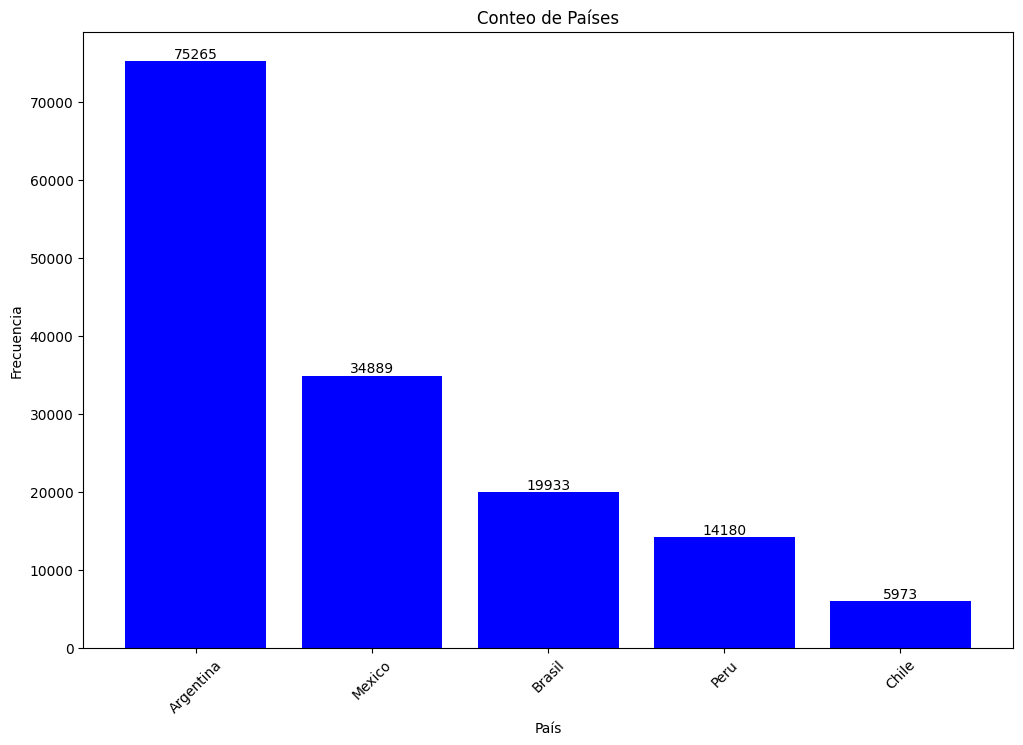

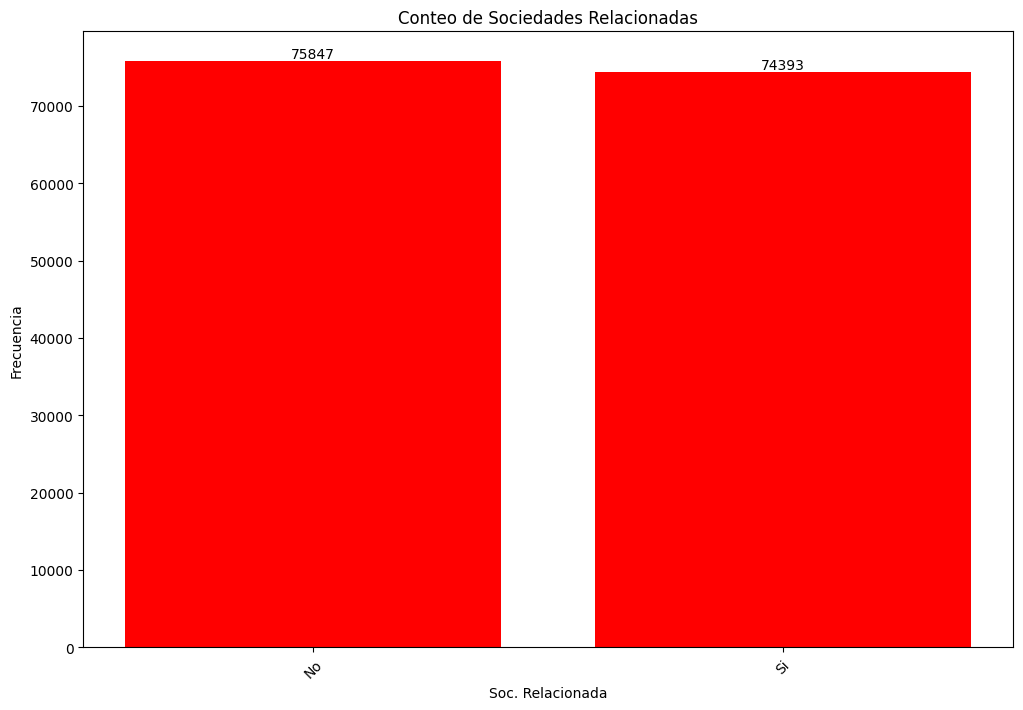

In [59]:
# Crear un conteo de las categorías en cada variable
país_counts = Facturación_América['País'].value_counts()

soc_rel_counts = Facturación_América['Soc. Relacionada'].value_counts()

# Función para agregar etiquetas de frecuencia
def agregar_etiquetas_de_frecuencia(ax, counts):
    for i, value in enumerate(counts.values):
        ax.text(i, value + 0.5, str(value), ha='center', va='bottom')

# Graficar el barplot para 'País'
plt.figure(figsize=(12, 8))
ax1 = plt.bar(país_counts.index, país_counts.values, color='blue')
plt.title('Conteo de Países')
plt.xlabel('País')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
agregar_etiquetas_de_frecuencia(plt.gca(), país_counts)
plt.show()



# Graficar el barplot para 'Soc. Relacionada'
plt.figure(figsize=(12, 8))
ax4 = plt.bar(soc_rel_counts.index, soc_rel_counts.values, color='red')
plt.title('Conteo de Sociedades Relacionadas')
plt.xlabel('Soc. Relacionada')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
agregar_etiquetas_de_frecuencia(plt.gca(), soc_rel_counts)
plt.show()

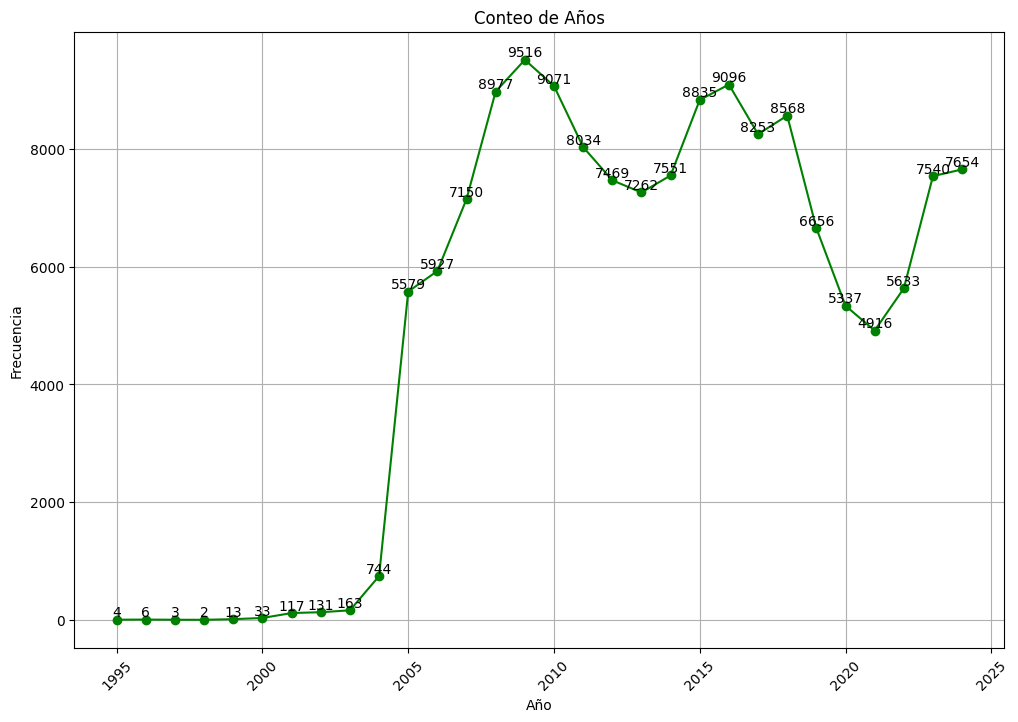

In [60]:
# Crear un conteo de las categorías en cada variable
año_counts = Facturación_América['Año'].value_counts().sort_index()

# Función para agregar etiquetas de frecuencia
def agregar_etiquetas_de_frecuencia_linea(ax, counts):
    for i, value in enumerate(counts.values):
        ax.text(counts.index[i], value, str(value), ha='center', va='bottom')

# Graficar el gráfico de líneas para 'Año'
plt.figure(figsize=(12, 8))
ax = plt.plot(año_counts.index, año_counts.values, marker='o', color='green')
plt.title('Conteo de Años')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
agregar_etiquetas_de_frecuencia_linea(plt.gca(), año_counts)
plt.grid(True)
plt.show()

Podemos comprender que vistos todos juntos, hay diferencias de actividad por paises y por años. De este modo y a los fines del presente trabajo, podríamos elegir cualquiera de los paises para ver puntualmente su situación.
Optamos por tomar como ejemplo Chile, en función a que es el país que mayor estabilidad económica a mostrado en el periodo analizado.

In [61]:
facturacion_chile = Facturación_América[Facturación_América['País'] == 'Chile']

# Verificar que la columna 'Impte.valor.ML2' esté en formato numérico
facturacion_chile['Impte.valor.ML2'] = pd.to_numeric(facturacion_chile['Impte.valor.ML2'], errors='coerce')

# Agrupar por año en lugar de país para obtener estadísticas anuales
total_facturado_chile = facturacion_chile.groupby('Año')['Impte.valor.ML2'].sum().reset_index()

# Calcular estadísticas
media_ingresos = total_facturado_chile['Impte.valor.ML2'].mean()
mediana_ingresos = total_facturado_chile['Impte.valor.ML2'].median()
moda_ingresos = total_facturado_chile['Impte.valor.ML2'].mode()

# Imprimir resultados
print("Media de ingresos: USD {:,.2f}".format(media_ingresos))
print("Mediana de ingresos: USD {:,.2f}".format(mediana_ingresos))
if not moda_ingresos.empty:
    print("Moda de ingresos: USD {:,.2f}".format(moda_ingresos[0]))
else:
    print("Moda de ingresos: No hay moda")

Media de ingresos: USD 24,776,992,299.10
Mediana de ingresos: USD 12,469,464,712.50
Moda de ingresos: USD 2,144,600,505.00


<ipython-input-61-411048cb2699>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  facturacion_chile['Impte.valor.ML2'] = pd.to_numeric(facturacion_chile['Impte.valor.ML2'], errors='coerce')


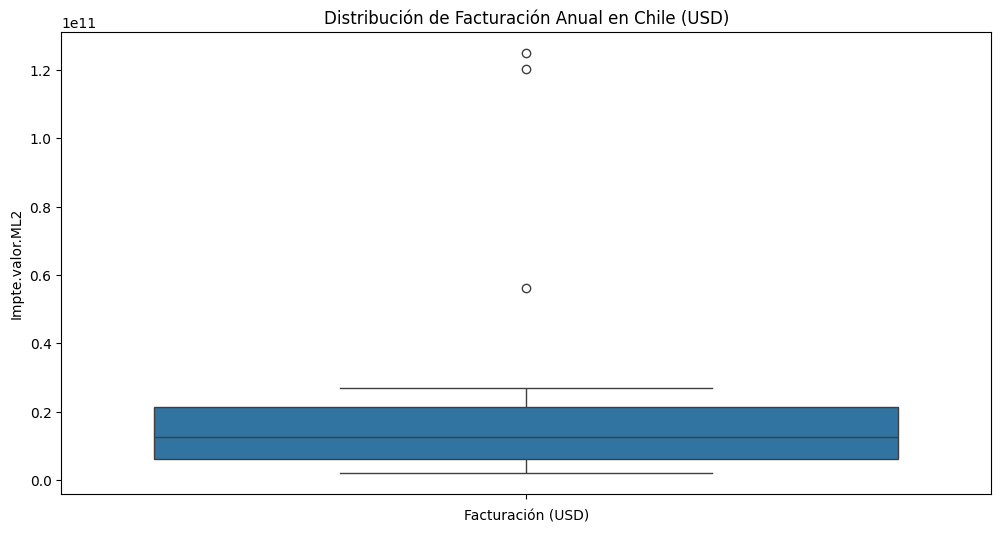

In [62]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=total_facturado_chile['Impte.valor.ML2'])
plt.title("Distribución de Facturación Anual en Chile (USD)")
plt.xlabel("Facturación (USD)")
plt.show()

Tenemos dos valores outliers; analizaremos a que se debe.

In [63]:
Q1 = total_facturado_chile['Impte.valor.ML2'].quantile(0.25)  # Percentil 25
Q3 = total_facturado_chile['Impte.valor.ML2'].quantile(0.75)  # Percentil 75
IQR = Q3 - Q1  # Rango intercuartil

# Definir valores atípicos (1.5 veces el IQR por encima o debajo)
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = total_facturado_chile[
    (total_facturado_chile['Impte.valor.ML2'] < limite_inferior) |
    (total_facturado_chile['Impte.valor.ML2'] > limite_superior)
]

print("Valores atípicos encontrados:")
print(outliers)

Valores atípicos encontrados:
     Año    Impte.valor.ML2
17  2022  56,175,473,999.00
18  2023 125,071,732,714.00
19  2024 120,170,161,656.00


<ipython-input-64-4468dcc3243c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Año', y='Impte.valor.ML2', data=total_facturado_chile, palette="Blues_r")


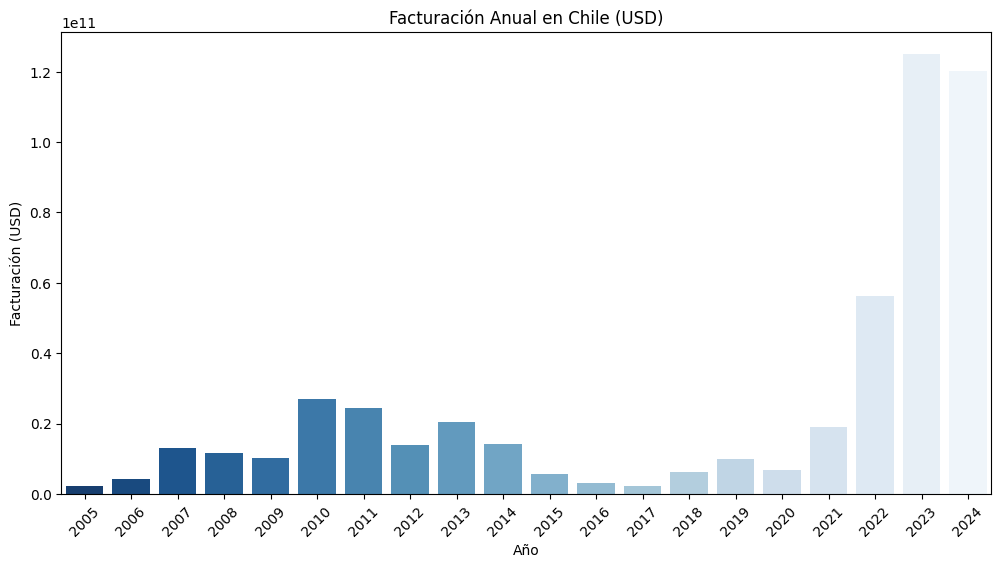

In [64]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Año', y='Impte.valor.ML2', data=total_facturado_chile, palette="Blues_r")
plt.title("Facturación Anual en Chile (USD)")
plt.xlabel("Año")
plt.ylabel("Facturación (USD)")
plt.xticks(rotation=45)
plt.show()

In [65]:
# Calcular el sesgo de la distribución
sesgo = skew(total_facturado_chile['Impte.valor.ML2'])

print(f"Sesgo de la distribución: {sesgo:.2f}")

Sesgo de la distribución: 2.19


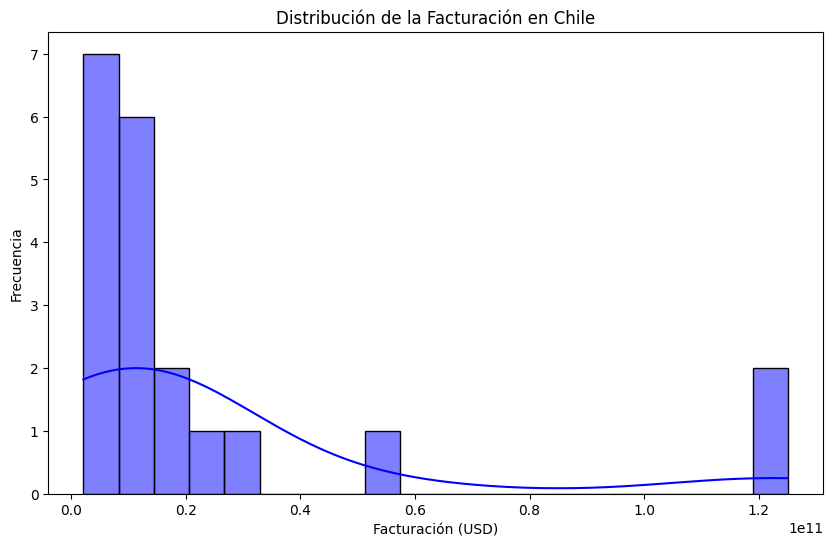

In [66]:
plt.figure(figsize=(10,6))
sns.histplot(total_facturado_chile['Impte.valor.ML2'], bins=20, kde=True, color="blue")
plt.title("Distribución de la Facturación en Chile")
plt.xlabel("Facturación (USD)")
plt.ylabel("Frecuencia")
plt.show()

In [67]:
# Ordenar los datos de facturación por año, de mayor a menor
facturacion_ordenada = total_facturado_chile.sort_values(by='Impte.valor.ML2', ascending=False)

print(facturacion_ordenada)

     Año    Impte.valor.ML2
18  2023 125,071,732,714.00
19  2024 120,170,161,656.00
17  2022  56,175,473,999.00
5   2010  26,856,207,218.00
6   2011  24,325,415,867.00
8   2013  20,318,032,985.00
16  2021  18,923,039,753.00
9   2014  14,300,206,139.00
7   2012  13,911,405,680.00
2   2007  13,185,330,752.00
3   2008  11,753,598,673.00
4   2009  10,151,767,184.00
14  2019   9,900,912,398.00
15  2020   6,739,736,463.00
13  2018   6,320,423,869.00
10  2015   5,566,913,038.00
1   2006   4,331,837,256.00
11  2016   3,021,217,828.00
0   2005   2,371,832,005.00
12  2017   2,144,600,505.00


In [68]:
valor_inicial = facturacion_ordenada.iloc[-1]['Impte.valor.ML2']  # Primer año registrado
valor_final = facturacion_ordenada.iloc[0]['Impte.valor.ML2']  # Último año registrado
años = facturacion_ordenada['Año'].nunique()  # Cantidad de años analizados

# Fórmula de CAGR
CAGR = ((valor_final / valor_inicial) ** (1 / años)) - 1

print(f"Tasa de crecimiento anual compuesto (CAGR): {CAGR:.2%}")

Tasa de crecimiento anual compuesto (CAGR): 22.54%


In [69]:
# Filtrar solo hasta 2021
facturacion_sin_outliers = total_facturado_chile[total_facturado_chile['Año'] <= 2021]

# Ordenar por año
facturacion_sin_outliers = facturacion_sin_outliers.sort_values(by='Año')

# Valores inicial y final de facturación antes del boom
valor_inicial_sin = facturacion_sin_outliers.iloc[0]['Impte.valor.ML2']  # Primer año registrado (2015)
valor_final_sin = facturacion_sin_outliers.iloc[-1]['Impte.valor.ML2']  # Último año antes del boom (2021)
años_sin = facturacion_sin_outliers['Año'].nunique()  # Cantidad de años analizados

# Recalcular CAGR sin outliers
CAGR_sin_outliers = ((valor_final_sin / valor_inicial_sin) ** (1 / años_sin)) - 1

print(f"Tasa de crecimiento anual compuesto sin outliers (CAGR): {CAGR_sin_outliers:.2%}")

Tasa de crecimiento anual compuesto sin outliers (CAGR): 12.99%


Podemos concluir que los dos valores outliers se deben al crecimiento aceleredo en los dos ultimos años.

En Chile, el desarrollo minero durante 2023 y 2024 ha sido significativo y ha mostrado varios hitos importantes. Aquí tienes un resumen de los principales aspectos:

2023
Producción de Cobre: La producción de cobre alcanzó 1,328 millones de toneladas, con un aumento notable en comparación con años anteriores.

Sostenibilidad: Codelco implementó iniciativas significativas para reducir las emisiones de gases de efecto invernadero, como el uso de bolas de molienda fabricadas con material reciclado en su mina El Teniente.

Mercado Global: Chile enfrentó desafíos debido a descubrimientos significativos en otras regiones, como el hallazgo en el altiplano tibetano de China, que podría afectar la demanda de cobre chileno.

2024
Producción de Cobre: En diciembre de 2024, la producción de cobre alcanzó 566.547 toneladas, un aumento del 14,3% en comparación con el mismo mes del año anterior.

Sostenibilidad: Codelco continuó sus esfuerzos de sostenibilidad, logrando reducir las emisiones de CO₂ en un 25% para 2030.

Inversión en Exploración: A pesar de una disminución del 4,6% en el gasto en exploración minera, Chile mantuvo su liderazgo en América Latina, con una inversión de 794 millones de dólares.

Mercado Global: La competencia global y la estrategia de las grandes mineras de enfocarse en la producción actual afectaron el sector.

En resumen, el sector minero en Chile ha mostrado un crecimiento significativo y ha implementado diversas iniciativas para mejorar la sostenibilidad y la seguridad en sus operaciones.

# Preprocesamiento de datos

##Analizo los Outliers

Por lo que estuve averiguando, dado que los datos son reales, voy a transformarlos con el metodo Min-Max Scaling, porque no quiero perder los datos y quiero mantener una relación sin distorición.

# Feature Selection

# Modelos

# Optimización de modelos

# Conclusiones Finales